## Rental Prices Barcelona 2014 to 2022

### Exploración de datos

### Importamos las bibliotes:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

### Cargar y explorar los datos
Los datos se cargan desde un archivo CSV que contiene 4622 filas y 5 variables de diferentes tipos. 

In [2]:
data = pd.read_csv("Barcelona_rent_price.csv", delimiter=';')

#### Si alteró el dataset: 
La variable “Average Rent” estaba dividida en dos categorías y ambas con 2311 filas o registros (Average Rent (euro/month) y 
Average Rent per Surface (euro/m²). Hemos modificado el conjunto de datos y organizado una nueva columna que representa el precio por metro cuadrado (precio/m²)..



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2311 non-null   int64  
 1   Trimester           2311 non-null   int64  
 2   District            2311 non-null   object 
 3   Neighbourhood       2311 non-null   object 
 4   Price (euro/month)  2311 non-null   float64
 5   Price (euro/m2)     2311 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 108.5+ KB


### Identificación de variable objetivo: Precio m2a

In [4]:
data.head()

,Year,Trimester,District,Neighbourhood,Price (euro/month),Price (euro/m2)
0,2014,1,Ciutat Vella,el Raval,589.55,10.76
1,2014,1,Ciutat Vella,Gothic Quarter,712.79,10.58
2,2014,1,Ciutat Vella,la Barceloneta,540.71,14.40
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01
4,2014,1,Eixample,Fort Pienc,736.09,10.42


### Presencia de nulos o faltantes:

In [5]:
data.isnull().sum()

Year                  0
Trimester             0
District              0
Neighbourhood         0
Price (euro/month)    0
Price (euro/m2)       0
dtype: int64

### Metricas:
 - Precio/m2 X año
 - Precio/m2 X distrito
 - Precio/mes X año
 - Precio/mes X distrito
  

In [6]:
price_year_metrics_meter = data.groupby("Year")["Price (euro/m2)"].agg(('mean','max','min','median','std'))
price_year_metrics_meter

,mean,max,min,median,std
Year,,,,,
2014,9.726777,16.14,3.54,9.660,1.763694
2015,10.453043,17.00,4.00,10.305,2.103478
2016,11.494239,19.22,3.18,11.445,2.384452
2017,12.638059,20.61,4.45,12.640,2.479090
2018,12.819444,18.15,7.22,12.630,1.942466
2019,13.374349,18.50,7.10,13.400,1.932396
2020,13.321190,20.90,6.20,13.400,1.907516
2021,12.720741,18.00,6.70,12.750,1.701480
2022,13.354815,21.30,3.90,13.400,2.278803


In [7]:
price_district_metrics_meter = data.groupby("District")["Price (euro/m2)"].agg(('mean','max','min','median','std'))
price_district_metrics_meter.sort_values("mean")

,mean,max,min,median,std
District,,,,,
Nou Barris,9.983249,13.10,3.54,10.070,1.787796
Sant Andreu,10.495654,13.20,3.18,10.750,1.865707
Horta-Guinardo,11.315572,15.20,7.62,11.600,1.575539
Sants-Montjuic,11.951235,15.30,3.90,12.390,1.845107
Sant Marti,12.663088,20.90,6.84,12.495,2.533993
Gracia,12.830824,15.60,8.85,12.960,1.581878
Eixample,12.892059,15.20,9.64,13.350,1.451944
Les Corts,13.838137,17.66,10.02,14.100,1.658680
Ciutat Vella,14.363456,21.30,9.84,14.200,2.306823


In [8]:
price_year_metrics_month = data.groupby("Year")["Price (euro/month)"].agg(('mean','max','min','median','std'))
price_year_metrics_month

,mean,max,min,median,std
Year,,,,,
2014,661.639048,1762.06,145.45,613.580,215.937641
2015,695.240399,2034.00,187.00,638.140,235.715707
2016,750.959891,1692.20,142.34,691.395,247.966149
2017,829.380403,1882.42,302.52,771.780,253.210128
2018,874.052259,1849.52,434.52,817.965,233.185559
2019,923.321561,2023.40,350.50,857.600,249.443552
2020,915.921190,1932.30,452.00,859.900,237.068437
2021,871.593704,1816.50,447.50,816.350,221.192799
2022,922.546667,1944.50,517.70,865.300,246.588864


In [9]:
price_district_metrics_month = data.groupby("District")["Price (euro/month)"].agg(('mean','max','min','median','std'))
price_district_metrics_month.sort_values("mean")


,mean,max,min,median,std
District,,,,,
Nou Barris,597.405742,855.5,145.45,612.300,116.540775
Sant Andreu,669.368551,898.5,142.34,686.275,134.890762
Horta-Guinardo,711.139677,1044.0,368.00,720.300,110.320889
Sants-Montjuic,745.296831,1407.9,350.50,773.700,121.667310
Gracia,824.909647,1060.5,537.15,840.335,123.576290
Ciutat Vella,834.704485,1181.6,540.71,850.475,145.289027
Sant Marti,864.329647,1498.6,423.45,828.705,217.520181
Eixample,963.165245,1349.6,663.23,957.100,156.659324
Les Corts,1196.391471,2034.0,679.54,1017.800,391.495912


### Distribuición de los precios:

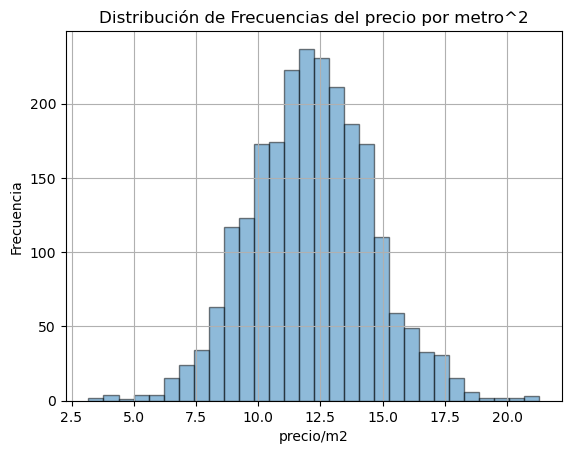

In [10]:
plt.hist(data["Price (euro/m2)"],  bins=30, alpha=0.5, edgecolor='black')

plt.title('Distribución de Frecuencias del precio por metro^2')
plt.xlabel('precio/m2')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

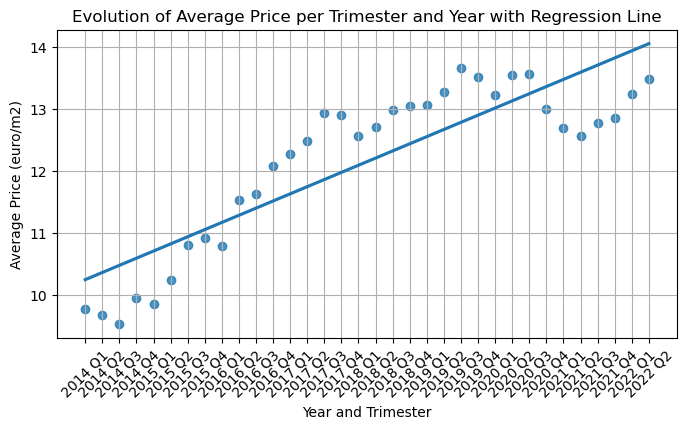

In [11]:
grouped = data.groupby(['Year', 'Trimester'])['Price (euro/m2)'].mean().reset_index()

grouped['Year_Trimester'] = grouped['Year'].astype(str) + ' Q' + grouped['Trimester'].astype(str)
grouped['Time'] = grouped['Year'] + (grouped['Trimester'] - 1) / 4

plt.figure(figsize=(8, 4))
sns.regplot(x='Time', y='Price (euro/m2)', data=grouped, marker='o', ci=None)
plt.xlabel('Year and Trimester')
plt.ylabel('Average Price (euro/m2)')
plt.title('Evolution of Average Price per Trimester and Year with Regression Line')
plt.xticks(ticks=grouped['Time'], labels=grouped['Year_Trimester'], rotation=45)
plt.grid(True)
plt.show()

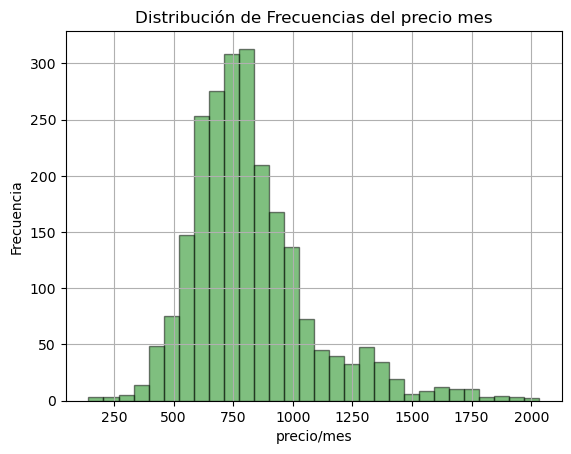

In [12]:
plt.hist(data["Price (euro/month)"], color='green',  bins=30, alpha=0.5, edgecolor='black')

plt.title('Distribución de Frecuencias del precio mes')
plt.xlabel('precio/mes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


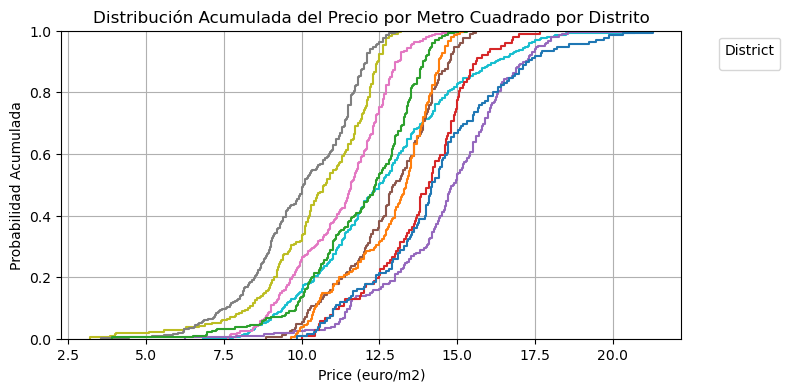

In [13]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="Price (euro/m2)", hue="District", palette="tab10")
plt.title('Distribución Acumulada del Precio por Metro Cuadrado por Distrito')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Probabilidad Acumulada')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

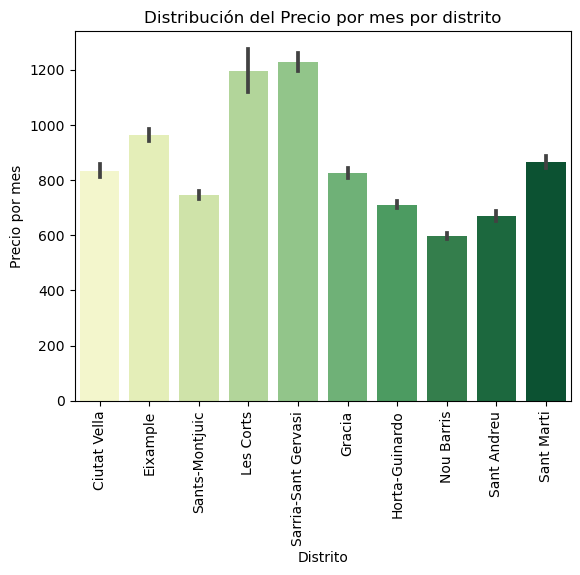

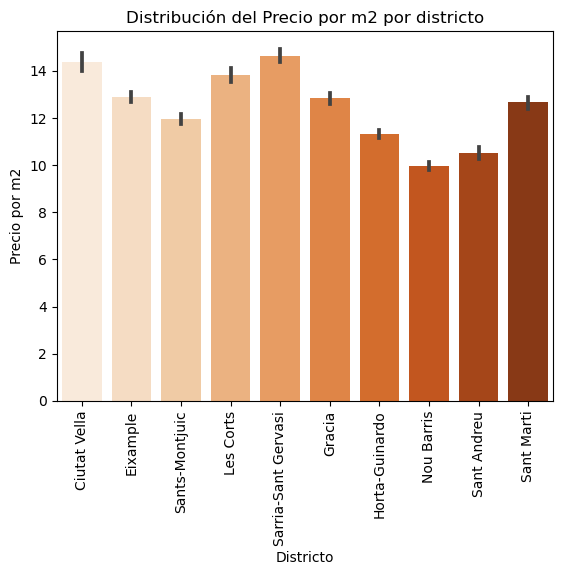

In [15]:
sns.barplot(x='District', y='Price (euro/month)', data=data, palette='YlGn')
plt.xlabel('Distrito')
plt.ylabel('Precio por mes')
plt.title('Distribución del Precio por mes por distrito')
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='District', y='Price (euro/m2)', data=data, palette='Oranges')
plt.xlabel('Districto')
plt.ylabel('Precio por m2')
plt.title('Distribución del Precio por m2 por districto')
plt.xticks(rotation=90)
plt.show()

3. CALIDAD DEL DATO

    - como se confirmó en la exploracion inicial , no tenemos datos nulos 
    - para gestion de outliers decidimos explorar reemplazo por la mediana y deteccion por kmeans
    - nos remitimos a archivos, median_model y model_cluster
    

5. BINARIZACION DE CATEGORICAS
    se elige One-Hot Encoding , para las variables categoricas "Disctric" , "Neighborhood"
    # Binarización de variables categóricas
    data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

6. DIVISION TRAIN TEST
    # División en características (X) y variable objetivo transformada (y)
X = data_encoded.drop(['Price (euro/m2)', 'log_Price (euro/m2)'], axis=1)
y = data_encoded['log_Price (euro/m2)']



# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


7. TRANSFORMACION (ESCALADO)
a. MinMax
    # Escalado de los datos
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)


    



8. MODELO
# Entrenar y evaluar el modelo Ridge
ridge_model = Ridge(alpha=1.0)


9. ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_log = ridge_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Deshacer la transformación logarítmica
y_test_exp = np.expm1(y_test)

10. EVALUACIÓN DEL MODELO
mae = mean_absolute_error(y_test_exp, y_pred)
mse = mean_squared_error(y_test_exp, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')

11. PREDICCION CON NUEVOS DATOS
